In [4]:
import numpy as np
from importlib import reload
import astropy.units as u
from astropy.units import Quantity
from mpl_toolkits.mplot3d import Axes3D
from astroquery.gaia import Gaia
from astropy.table import QTable

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [14]:
job = Gaia.launch_job_async("SELECT gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.phot_g_mean_mag, gaia.pmra, gaia.pmdec \
FROM gaiadr1.tgas_source AS gaia \
WHERE gaia.parallax >= 3.333333 AND gaia.phot_g_mean_mag < 11 AND gaia.parallax_error < 0.314159" \
                           , dump_to_file=True)
print(job)

Launched query: 'SELECT gaia.source_id, gaia.ra, gaia.dec, gaia.parallax, gaia.phot_g_mean_mag, gaia.pmra, gaia.pmdec FROM gaiadr1.tgas_source AS gaia WHERE gaia.parallax >= 3.333333 AND gaia.phot_g_mean_mag < 11 AND gaia.parallax_error < 0.314159'
Retrieving async. results...
Jobid: 1519933693308O
Phase: None
Owner: None
Output file: async_20180301114811.vot
Results: None


In [70]:
#initial grab with only parallax limit to < 3.33333 and G-band magnitude to < 20
table3 = QTable.read('async_20180220140057.vot', format='votable')
print(table3)

     source_id              ra         ...      parallax       phot_g_mean_mag  
                           deg         ...     Angle[mas]       Magnitude[mag]  
------------------- ------------------ ... ------------------ ------------------
 510179408242548736 21.572401117348235 ...  3.333337207495958 11.175918874199617
4205661834858348672  285.5519223205407 ... 3.3333401766663426 10.097661616048072
1856655091517580288   308.499255158565 ... 3.3333451927253597 12.492861810252421
 311494770885135744  16.55087539976397 ... 3.3333546044058378  8.793189531788062
2464155057067665536 26.900678181709676 ...  3.333358847191919  11.99352753812773
1622216054007117440 241.73861206142863 ... 3.3333636097796857  11.66742261222085
3899815564440242560 180.79319343700067 ... 3.3333688849110352 11.821875710721399
2244142952148379136 303.34922505569557 ... 3.3333695596843307 11.619843685402847
2098420106274189696  280.2889609699104 ...  3.333372263296319 10.709418277198807
5800980776431233024 263.2589

In [71]:
#updated SQL query to limit G-band magnitudes to < 11
table2 = QTable.read('async_20180223115303.vot', format='votable')
print(table2)

     source_id              ra         ...      parallax       phot_g_mean_mag  
                           deg         ...     Angle[mas]       Magnitude[mag]  
------------------- ------------------ ... ------------------ ------------------
4205661834858348672  285.5519223205407 ... 3.3333401766663426 10.097661616048072
 311494770885135744  16.55087539976397 ... 3.3333546044058378  8.793189531788062
2098420106274189696  280.2889609699104 ...  3.333372263296319 10.709418277198807
  75463400024659968  35.15008704069457 ... 3.3333883241336473 10.532819776698439
6557775523182879104  329.0305149993941 ...  3.333389540026992 10.654886303542536
 905067497529540736  125.7743091722678 ...  3.333389930156821   10.3762318017776
6368150621119752192  315.4256980946231 ...  3.333424608111585  10.26702166995925
5264083510511955072 109.09130537709642 ...  3.333424921793283 10.646833327070507
1757772128175786240 313.84532029536393 ... 3.3334256757999587 10.689829142452975
1827008581535328512  299.773

In [15]:
#updated SQL query to limit parallax error to < 0.314159
table = job.get_results()
print(table)

     source_id              ra         ...        pmdec       
                           deg         ...       mas / yr     
------------------- ------------------ ... -------------------
4205661834858348672  285.5519223205407 ... -13.380923996061297
 311494770885135744  16.55087539976397 ...  -42.33394089806633
  75463400024659968  35.15008704069457 ...   -17.5295711621284
6557775523182879104  329.0305149993941 ...  -6.917637197133751
6368150621119752192  315.4256980946231 ... -1.2448164460834557
5264083510511955072 109.09130537709642 ...  13.549783372957659
1827008581535328512  299.7730613367215 ...  4.3816738126784855
3049076070310478592 104.12073696157046 ...  -6.323501074999745
6077129478299330176 184.15150852178223 ...  3.0359557241487325
4734399178309369344  50.25585714628703 ...     9.0348205215808
                ...                ... ...                 ...
1314438835015205248 251.27626104660175 ...   382.1352184978517
4017861056947245696 175.55039715065405 ...  -813.717124

In [54]:
ra = table['ra']
dec = table['dec']
plx = table['parallax']
plx = plx / 1000 #to arcseconds from mas
plx = 1/plx

In [62]:
#first attempt at calculating separation between sources
#obviously not a very good attempt
for c, table in enumerate(table, 1):
    separation = np.sqrt((ra[c] - ra[c-1])**2 + (dec[c] - dec[c-1])**2)
    #print(separation)

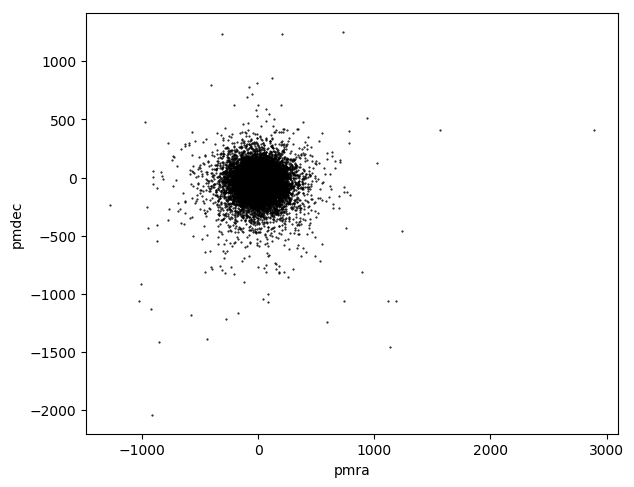

In [18]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
#fig.set_size_inches(8,8)
 
fig.tight_layout()

#ax.set_xlim(0., 360.)
#ax.set_ylim(-90., 90.)

ax.set_ylabel("pmdec")
ax.set_xlabel("pmra")
    
ax.plot(table['pmra'], table['pmdec'], color='k', marker='.', markersize=1, linestyle='None');

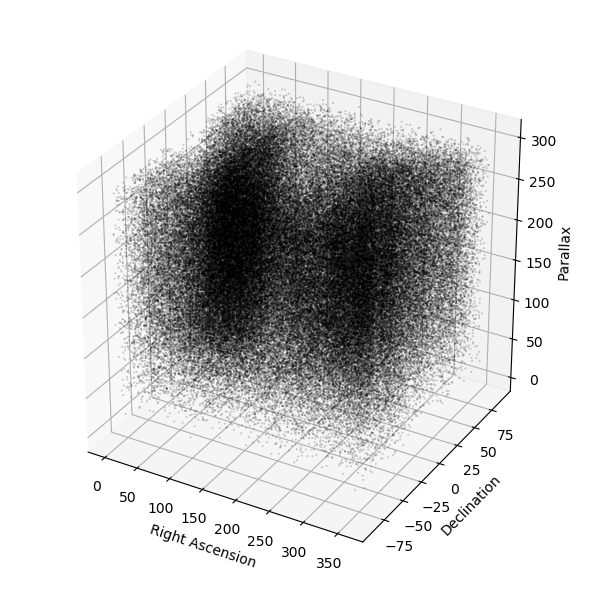

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

fig.set_size_inches(6,6)

fig.tight_layout()

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_zlabel("Parallax")


ax.scatter(ra, dec, plx, c = 'k', s=0.1, alpha=0.3);

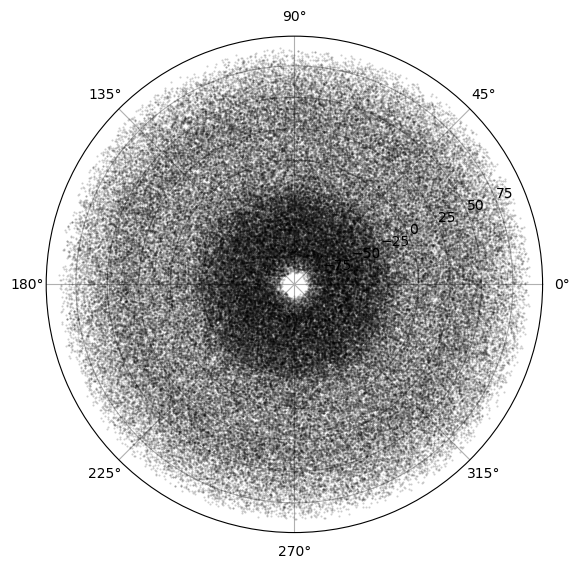

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='polar')

fig.tight_layout()

fig.set_size_inches(6,6)

ax.plot(ra, dec, marker=".", color='k', linestyle="None", markersize=1, alpha=0.2);

In [58]:
import ipyvolume as ipv
ipv.quickscatter(ra, dec, plx, size=0.15, color="blue")

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color=array('blue', dtype='<U4'), color_selected=array('white', dtype='<U5'), size=array(0.15), size_selected=array(2.6), x=array([285.55192232,  16.5508754 ,  35.15008704, ..., 313.33245585,
        92.64361965,   4.61210931]), y=array([ -7.0318432 ,  29.92242094,  13.65604858, ...,  62.15117255,
       -21.86762367,  44.02467259]), z=array([299.9993841 , 299.99808562, 299.99505091, ...,   7.0340582 ,
         5.7916844 ,   3.56201372]))], style={'axes': {'visible': True, 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'color': 'black'}, 'box': {'visible': True}, 'background-color': 'white'}, tf=None, width=400, xlim=[0.0, 359.988380210588], ylim=[-89.86093703749167, 89.66446836915713], zlim=[0.0, 299.9993841012936]),))

In [27]:
ravetable = QTable.read('rave_tgas_query.csv', format='csv')

In [28]:
print(ravetable)

row_id    ID_TGAS_source        RA_TGAS       ... phot_g_mean_mag_TGAS   HRV  
------ ------------------- ------------------ ... -------------------- -------
     1 3468060163078890752 184.89737863576525 ...   10.123850113157598  10.372
     2 6158339888161766400 188.61283657498848 ...    9.852586829713339  34.075
     3 6123173658014875136 213.83424541365062 ...   10.767653224679348 -11.692
     4 6123181698193650176 213.84389869951852 ...    9.535751921865415   7.105
     5 6124387003456389376 213.94007975781446 ...    10.42993553890063 -18.437
     6 6124426001759420288  213.0811013847169 ...    9.378088466376994   4.141
     7 6172819459867458944  212.1241301077434 ...   10.746696717249458  34.658
     8 6173086125797638016  211.7035009541234 ...   10.692889553336396   1.984
     9 6172983561977609088   212.492372668952 ...   10.299612983743081   54.19
    10 6269147501778060032  213.6456994318395 ...   10.155675567841126  42.442
   ...                 ...                ... ...   

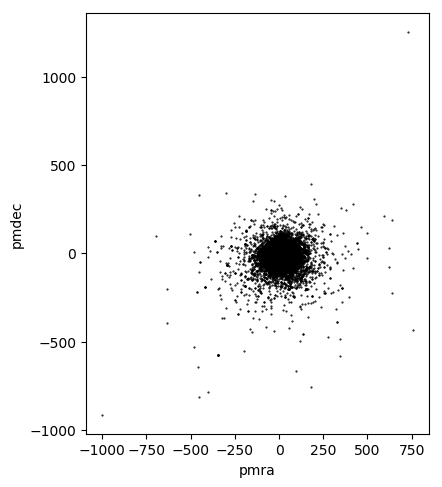

In [33]:
plt.style.use('default')
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
#fig.set_size_inches(8,8)
 
fig.tight_layout()

ax.set_ylabel("pmdec")
ax.set_xlabel("pmra")
    
ax.plot(ravetable['pmRA_TGAS'], ravetable['pmDE_TGAS'], color='k', marker='.', markersize=1, linestyle='None');